In [251]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText

In [252]:
b1 = np.reshape(np.fromfile('./landsat_data/band1c.raw', dtype='uint8'), (1500, 1500))
b2 = np.reshape(np.fromfile('./landsat_data/band2c.raw', dtype='uint8'), (1500, 1500))
b3 = np.reshape(np.fromfile('./landsat_data/band3c.raw', dtype='uint8'), (1500, 1500))
b4 = np.reshape(np.fromfile('./landsat_data/band4c.raw', dtype='uint8'), (1500, 1500))
b5 = np.reshape(np.fromfile('./landsat_data/band5c.raw', dtype='uint8'), (1500, 1500))
b6 = np.reshape(np.fromfile('./landsat_data/band6c.raw', dtype='uint8'), (1500, 1500))
b7 = np.reshape(np.fromfile('./landsat_data/band7c.raw', dtype='uint8'), (1500, 1500))

# Exercise 5: Normalized Difference Vegetation Index (NDVI)

Compute and display the vegetation index

### Q: Does it match what you would expect? I think so!

See p. 292 in Rees.

Tips: 
* Convert the integer bytes to `double()` DONE (float in Python)
* Then compute the NDVI ratio between -1 and 1 DONE
* Map the number back between 0 and 255 with `imagesc()` DONE (Python equivalent)

My Notes from Rees:

A vegetation index is calculated from the two bands, red (typically `0.6~0.7μm`) and near-infrared (typically `0.8 to 1.0μm`). For higher accuray, the reflectance values should be a) calibrated and b) corrected for atmospheric effects. However, uncorrected/original pixel values are also commonly used for analysis and interpretation of satellite data on vegetation. A popular example is the __*normalized difference vegetation index*__ (NDVI), which is given by:

\begin{equation*}
NDVI = \frac{r_{ni} - r_{red}}{r_{ni} + r_{red}}
\end{equation*}

where $r_{ni}$ is reflectance data for the near-infrared band and $r_{red}$ is the data for the red band. Range of NDVI values is given by [-1, 1]. 0 implies no vegetation, low NDVI values (<= 0.1) indicate barren areas (ex. rocks), and high + values imply highest density green leaves (ex. tropical forests).


References:<br />
1) [Measuring Vegetation] (https://earthobservatory.nasa.gov/Features/MeasuringVegetation/)<br />
2) [Landsat 8 Bands] https://landsat.gsfc.nasa.gov/landsat-8/landsat-8-bands/<br />
3) [Rees] Physical Principles of Remote Sensing

------------------------------------

For the given dataset (based on the USGS NLAPS header for Landsat Data 
in Appendix A of Image Processing Notes):
* band 3 is red
* band 4 is near infrared

## Calculation

In [253]:
r_red = b3.astype(float)
r_ni = b4.astype(float)

#checking values
#red
#ni

ndvi = (r_ni - r_red) / (r_ni + r_red)

In [254]:
#ndvi

In [255]:
flat_ndvi = ndvi.ravel()

In [256]:
# a) Multiply by 1000 to preserve up to 3 significant figures
# b) Convert to int for slightly faster processing?
cleaned_ndvi = (1000*flat_ndvi).astype(int)


In [257]:
cleaned_ndvi

array([-400, -368, -368, ...,  -19,  -42,  -37])

In [258]:
def label_axes_and_title(_plt, x_label, y_label, title):
    _plt.xlabel(x_label, fontsize=13)
    _plt.ylabel(y_label, fontsize=13)
    _plt.title(title, fontsize=16)

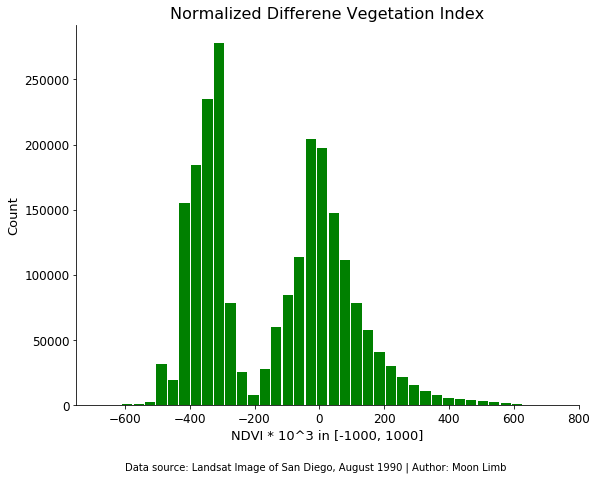

In [259]:
plt.figure(figsize=(9, 7))
ax = plt.subplot(111)  

# How to prettify matplotlib plots: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
# TODO: Figure out how to make edges clear 

# Remove plot frame lines (Top and Right)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# ML: Doesn't seem like it's doing anything for my figure
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# Set x-lim
plt.xlim(-750, 800)

# Make ticks visible
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

# The location of Data source seems to vary by browser setting... Adrian, hope it shows fine on your browser
plt.text(-600, -50000, "Data source: Landsat Image of San Diego, August 1990 | "  
         "Author: Moon Limb", fontsize=10) 


# rwidth < 1 makes the histogram bars distinguishable from each other
plt.hist(cleaned_ndvi, bins=50, color='green', rwidth=0.9)
label_axes_and_title(plt, 'NDVI * 10^3 in [-1000, 1000]', 
                     'Count', 
                     'Normalized Differene Vegetation Index')


plt.savefig("Normalized Difference Vegetation Index (La Jolla–August 1990).png", bbox_inches="tight");  
plt.show()

In [260]:
# print plt.hist.__doc__
# Q: What is weights?

In [261]:
def plot_ndvi(plt, _data, _subplot_num, _type):
    """ 
    Plot the given band (data) in grayscale
    
    _data [2-D Numpy array]
    """
    config = {
        'title': {'gray': 'NDVI (gray)', 
                  'terrain': 'NDVI (terrain)',
                  'gray_r': 'NDVI (gray reversed)',
                  'gnbu_r': 'NDVI (blue-green)',
                 },            
        'cmap': {'gray': plt.cm.gray, 
                 'terrain':  plt.cm.terrain, 
                 'gray_r': plt.cm.gray_r,
                 'gnbu_r': plt.cm.GnBu_r
                }
    }
    
    plt.subplot(_subplot_num)
    plt.imshow(_data, cmap=config['cmap'][_type])
    
    label_axes_and_title(plt, 'X', 'Y', config['title'][_type])
    plt.colorbar()

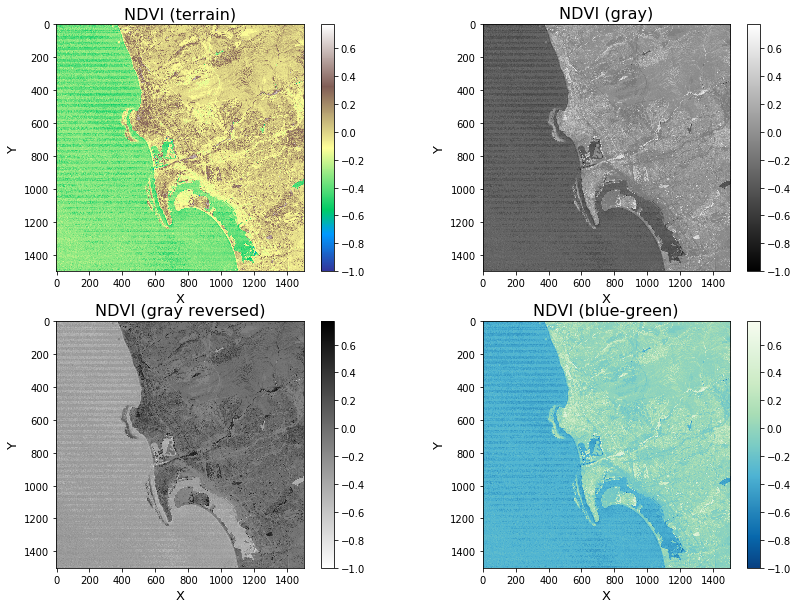

In [262]:
plt.figure(figsize=(14, 10))

# trying different color maps for fun. but outputing NDVI using 
# incorrect colormaps may result in 'deceptive visualizations
# for example, in the colored figure, high NDVI correlates with brown,
# and hence gives the wrong impression that more 'terrain' is present,
# when high NDVI in fact implies higher vegetation
plot_ndvi(plt, ndvi, 221, 'terrain') # trying terrain colormap
plot_ndvi(plt, ndvi, 222, 'gray')
plot_ndvi(plt, ndvi, 223, 'gray_r')
plot_ndvi(plt, ndvi, 224, 'gnbu_r')

plt.show()

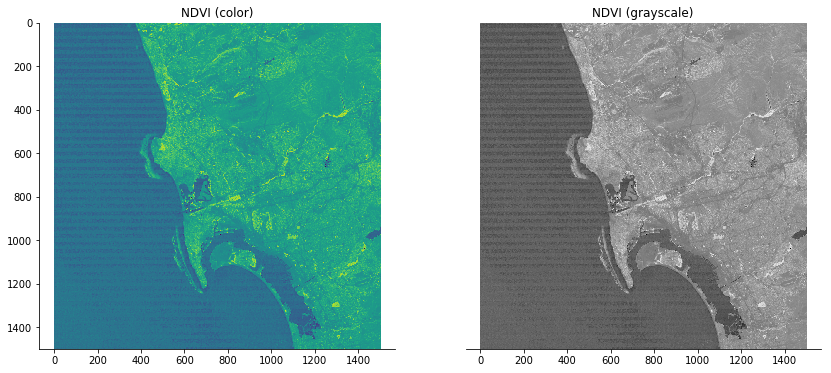

In [263]:
# Version 2: Sharing y-axis (less flexibility in figure sizing)

plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 6))

ax1.imshow(ndvi)
ax1.set_title('NDVI (color)')
ax1.spines["right"].set_visible(False) 
ax1.spines["top"].set_visible(False) 


ax2.imshow(ndvi, cmap=plt.cm.gray)

# Remove 'spines' for right figure (nicer visual)
# Can write neater, but good enough for now
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False) 
ax2.spines["right"].set_visible(False) 
ax2.get_xaxis().tick_bottom() 

ax2.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        labelleft='off') 

ax2.set_title('NDVI (grayscale)')
plt.show()